# A SHALLOW NETWORK IN KERAS

## Software dependencies for shallow net in Keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


## Loading MNIST data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

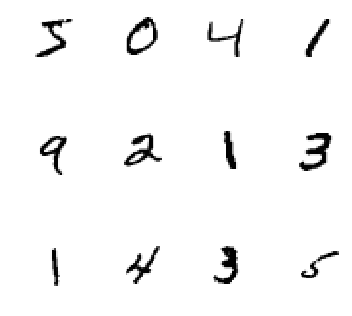

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

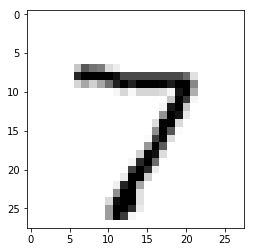

In [10]:
plt.imshow(X_valid[0], cmap='Greys')

In [11]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_valid[0]

7

## Reformatting the Data

In [14]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')
X_train /= 255
X_valid /= 255
X_valid[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [15]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

## Designing a Neural Network Architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

## Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

## Training a Neural Network Model

In [23]:
model.fit(X_train, y_train,
        batch_size=128, epochs=200,
        verbose=1,
        validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0921 - acc: 0.0986 - val_loss: 0.0916 - val_acc: 0.0958
Epoch 2/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0913 - acc: 0.0986 - val_loss: 0.0911 - val_acc: 0.0958
Epoch 3/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0909 - acc: 0.0986 - val_loss: 0.0909 - val_acc: 0.0958
Epoch 4/200
60000/60000 [==============================] - 1s 19us/step - loss: 0.0908 - acc: 0.0986 - val_loss: 0.0907 - val_acc: 0.0958
Epoch 5/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0906 - acc: 0.0986 - val_loss: 0.0906 - val_acc: 0.0958
Epoch 6/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0905 - acc: 0.0986 - val_loss: 0.0905 - val_acc: 0.0958
Epoch 7/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0905 - acc: 0.0986 - val_loss: 0.0904 - 

60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 60/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 61/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 62/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 63/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 64/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 65/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 119/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 120/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 121/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 122/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 123/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 124/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 125/200
60000/

60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 177/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 178/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 179/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 180/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 181/200
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 182/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 183/200
60000/60000 [=======

In [24]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 21us/step


[0.08996759872436523, 0.1135]